<a href="https://colab.research.google.com/github/sujan123123/Statistics/blob/master/NormalDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[0.00013383022576488537, 0.00013928497646575994, 0.00014494756042389079, 0.00015082527155051753, 0.00015692563406553172, 0.00016325640876624142, 0.0001698255994293427, 0.00017664145934756997, 0.0001837124980024558, 0.00019104748787459642, 0.00019865547139277096, 0.00020654576802322367, 0.00021472798150036477, 0.0002232120072000997, 0.0002320080396569397, 0.00024112658022599047, 0.00025057844489085744, 0.000260374772218439, 0.00027052703146151694, 0.0002810470308099821, 0.00029194692579145534, 0.0003032392278219991, 0.00031493681290751624, 0.0003270529304963689, 0.00033960121248364817, 0.0003525956823674382, 0.00036605076455732786, 0.00037998129383531333, 0.0003944025249691479, 0.00040933014247806934, 0.0004247802705507417, 0.00044076948311512156, 0.0004573148140598454, 0.00047443376760660845, 0.0004921443288328805, 0.0005104649743441716, 0.0005294146830949202, 0.0005490129473569432, 0.0005692797838342359, 0.0005902357449227678, 0.0006119019301137535, 0.0006342999975387372, 0.0006574521

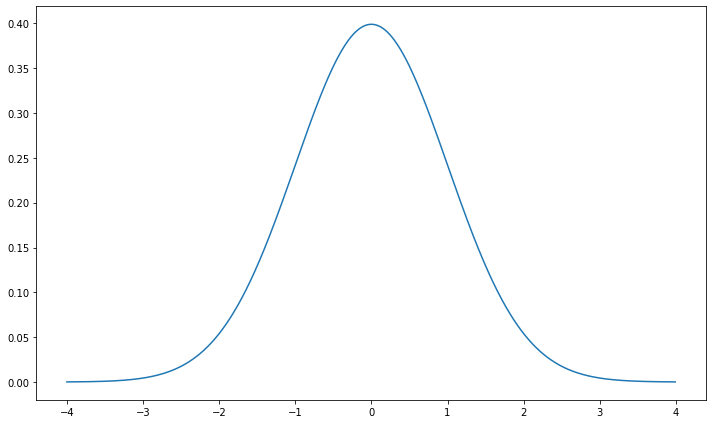

In [12]:
x = []
bell_curve = []
for i in np.arange(-4,4,0.01):
    bell_curve.append(norm.pdf(i))
    x.append(i)
print(bell_curve)
plt.subplots(figsize=(10,6))
sns.lineplot(x=x, y=bell_curve)
plt.tight_layout()
plt.savefig(fname='normal_dist_2', dpi=150)
plt.show()

In [13]:
mean_height = 5.5*12
stdev_height = 1*12
target = 6*12

height_surveys = np.zeros((10000,10))
for i in range(height_surveys.shape[0]):
    for j in range(height_surveys.shape[1]):
        height_surveys[i,j] = mean_height +\
                              np.random.normal()*stdev_height

print('Mean Height:', round(np.mean(height_surveys)/12,1), 'feet')
print('Standard Deviation of Height:', 
      round(np.var(height_surveys)**0.5/12,1), 'foot')

Mean Height: 5.5 feet
Standard Deviation of Height: 1.0 foot


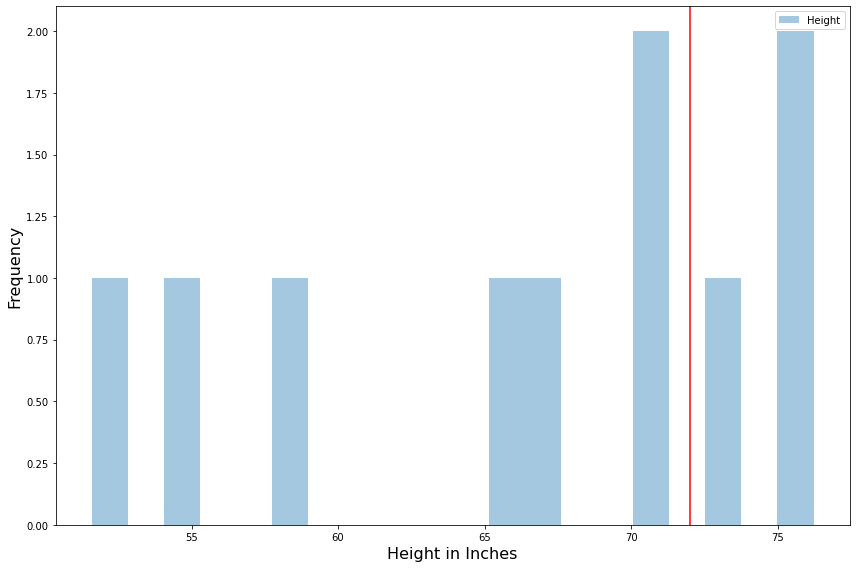

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(height_surveys[35], bins=20, kde=False, label='Height')

ax.set_xlabel("Height in Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(target, color='red')
plt.legend()
plt.tight_layout()

# plt.savefig(fname='height_one_sample_2', dpi=150)
plt.show()

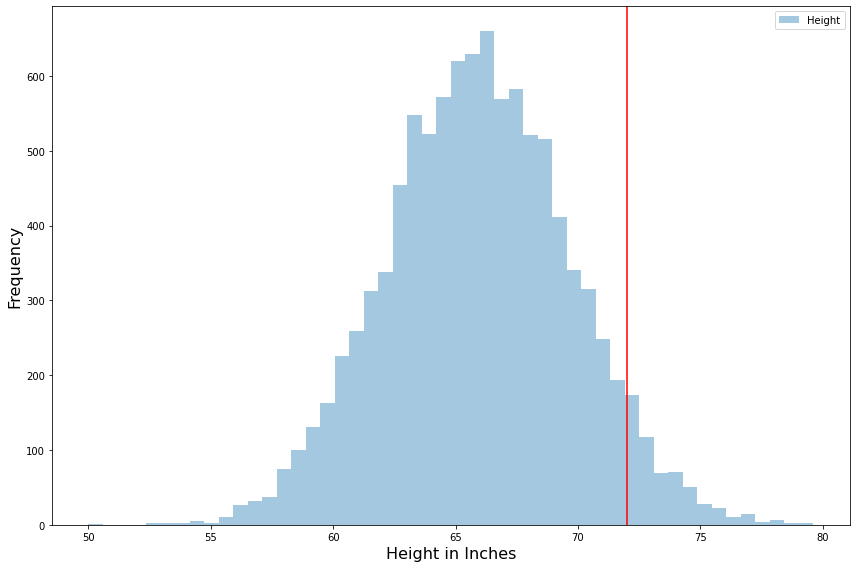

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(np.mean(height_surveys,axis=1), 
             kde=False, label='Height')

ax.set_xlabel("Height in Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(target, color='red')
plt.legend()
plt.tight_layout()

plt.savefig(fname='height_all_samples', dpi=150)
plt.show()

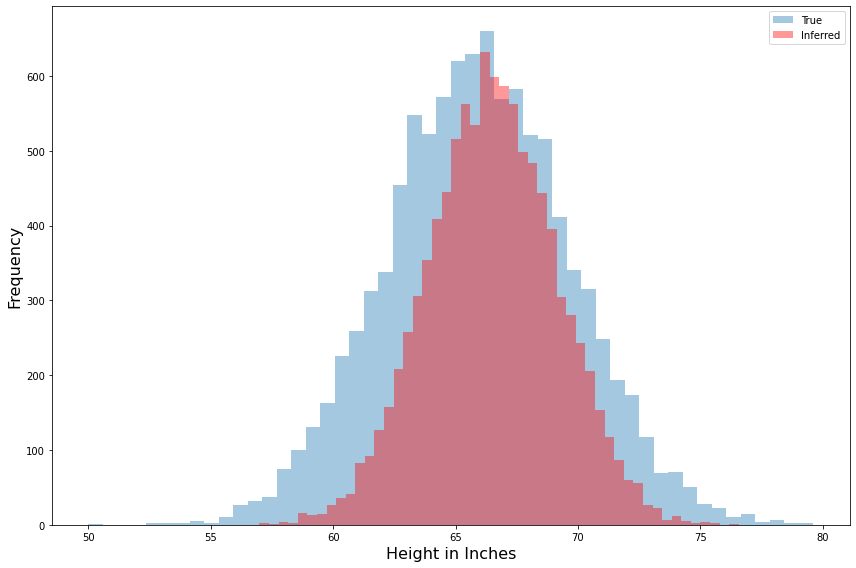

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot histogram of 10,000 sample means
sns.distplot(np.mean(height_surveys,axis=1), 
             kde=False, label='True')

# Calculate stats using single sample
sample_mean = np.mean(height_surveys[35])
sample_stdev = np.var(height_surveys[35])**0.5
# Calculate standard error
std_error = sample_stdev/(height_surveys[35].shape[0])**0.5

# Infer distribution using single sample
inferred_dist = [sample_mean + np.random.normal()*\
                 std_error for i in range(10000)]

# Plot histogram of inferred distribution
sns.distplot(inferred_dist, kde=False, 
             label='Inferred', color='red')

ax.set_xlabel("Height in Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()
plt.tight_layout()

plt.savefig(fname='height_actual_vs_theory', dpi=150)
plt.show()

In [17]:
inferred_dist = [sample_mean + np.random.normal()*\
                 std_error for i in range(10000)]

# Figure out how many are > than target
sum([1 for i in inferred_dist if i>=target])/len(inferred_dist)

0.0163

In [18]:
1 - norm.cdf(target, loc=sample_mean, scale=std_error)


0.017942953009499107

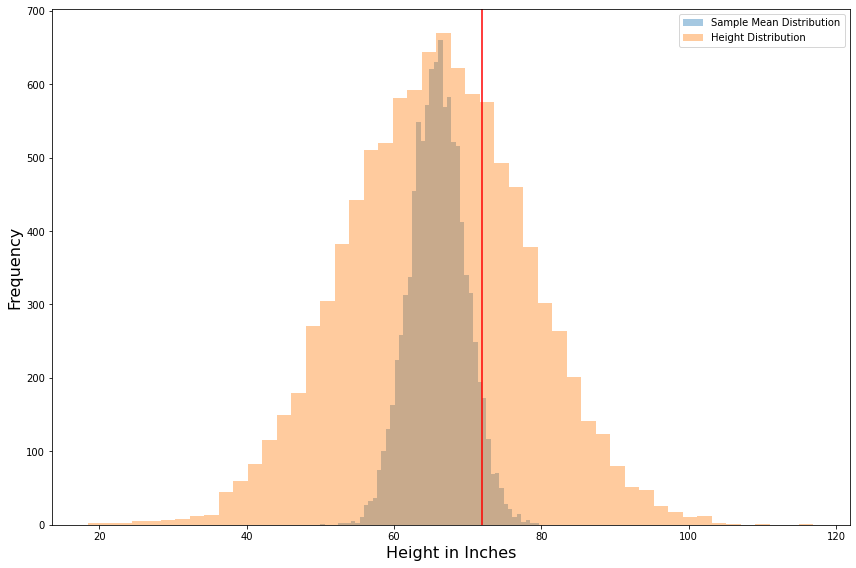

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(np.mean(height_surveys,axis=1), kde=False, 
             label='Sample Mean Distribution')
sns.distplot(height_surveys.flatten()[:height_surveys.shape[0]], 
             kde=False, label='Height Distribution')

ax.set_xlabel("Height in Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(target, color='red')
plt.legend()
plt.tight_layout()

plt.savefig(fname='height_all_samples_compare', dpi=150)
plt.show()


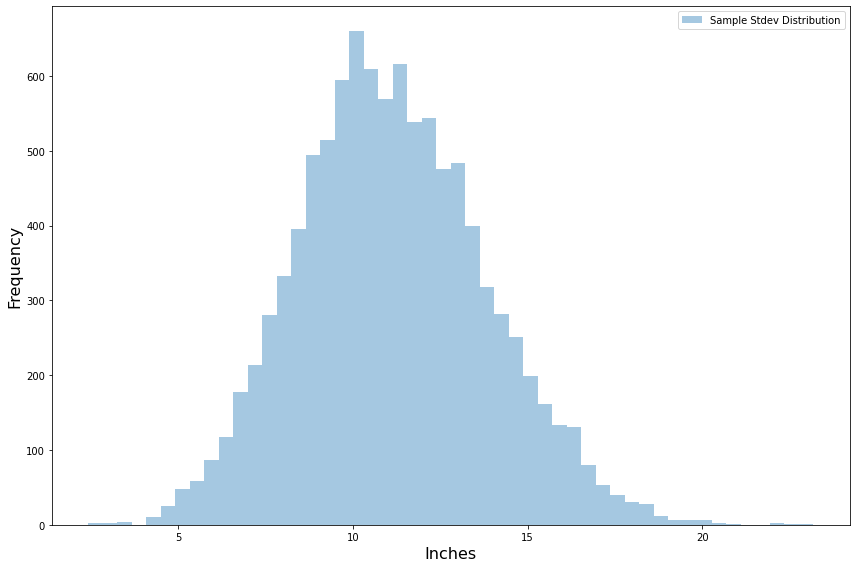

In [20]:
vol_dist = np.var(height_surveys, axis=1)**0.5

# Histogram that shows the distribution of sample stdev
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(vol_dist, kde=False, 
             label='Sample Stdev Distribution')

ax.set_xlabel("Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()
plt.tight_layout()

plt.savefig(fname='vol_dist', dpi=150)
plt.show()

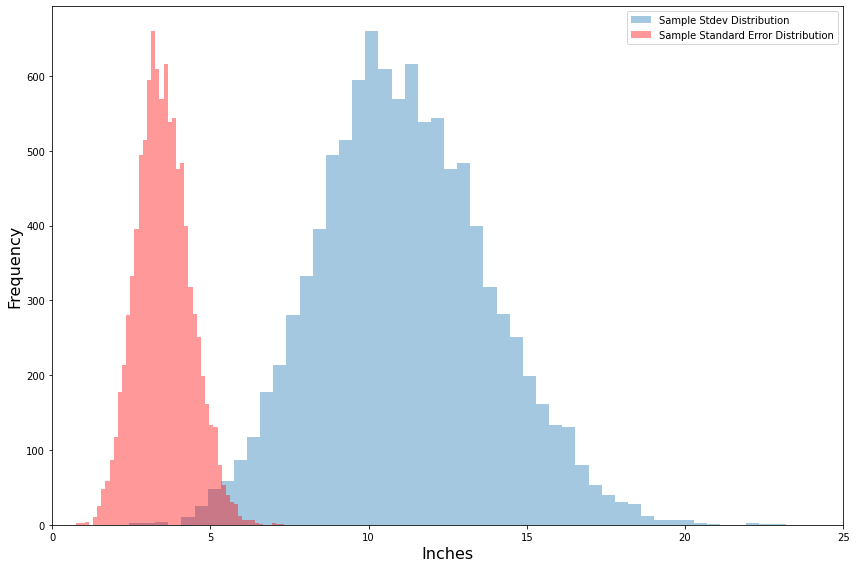

In [21]:
SE_dist = vol_dist/height_surveys.shape[1]**0.5

# Histogram that shows the distribution of sample stdev
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(vol_dist, kde=False, 
             label='Sample Stdev Distribution')

# Histogram that shows the distribution of standard error
sns.distplot(SE_dist, kde=False, color='red',
             label='Sample Standard Error Distribution')

ax.set_xlim([0, 25])
ax.set_xlabel("Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()
plt.tight_layout()

plt.savefig(fname='SE_dist', dpi=150)
plt.show()